# Forced Gravity Waves
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/crayjake/fgw-python/blob/master/src/FGW.ipynb)

In [ ]:
# imports
import numpy as np

from generator import evaluate, simulate, convert, EulerStep, CrankNicolson, CrankNicolsonDeep
from data import Meta

In [ ]:
# modes
js = np.array(list(range(1, 50)))
# heating
Qs = np.array([1] * len(js))
# heat time for each mode (only implemented in sim - large values mimic constant heating)
Ts = np.array([1e10] * len(js))

# f = 2 * 7.292 * (1e-5)
meta = Meta(Qs=Qs, js=js, Ts=Ts, time=600, dt=60, L=10000, D=50000, width=50, N=0.01, saveEvery=2)

Generating metadata:
Setting up space...
Creating matrices...


In [ ]:
# simulate and evaluate the data ( no z dep. )
simulationData = simulate(meta, CrankNicolsonDeep)
#evaluationData = evaluate(meta)

100%|██████████| 9/9 [00:02<00:00,  3.33it/s]


In [ ]:
# convert ( to get z dep. )
# this causes big data so you can provide a memory limit
meta.maxGB = 10
# NOTE: this changes <evalutationData/simulationData>.meta.maxGB
# ( as meta was passed as a ref )

sim1, contToken = convert(simulationData)

100%|██████████| 5/5 [00:29<00:00,  5.97s/it]


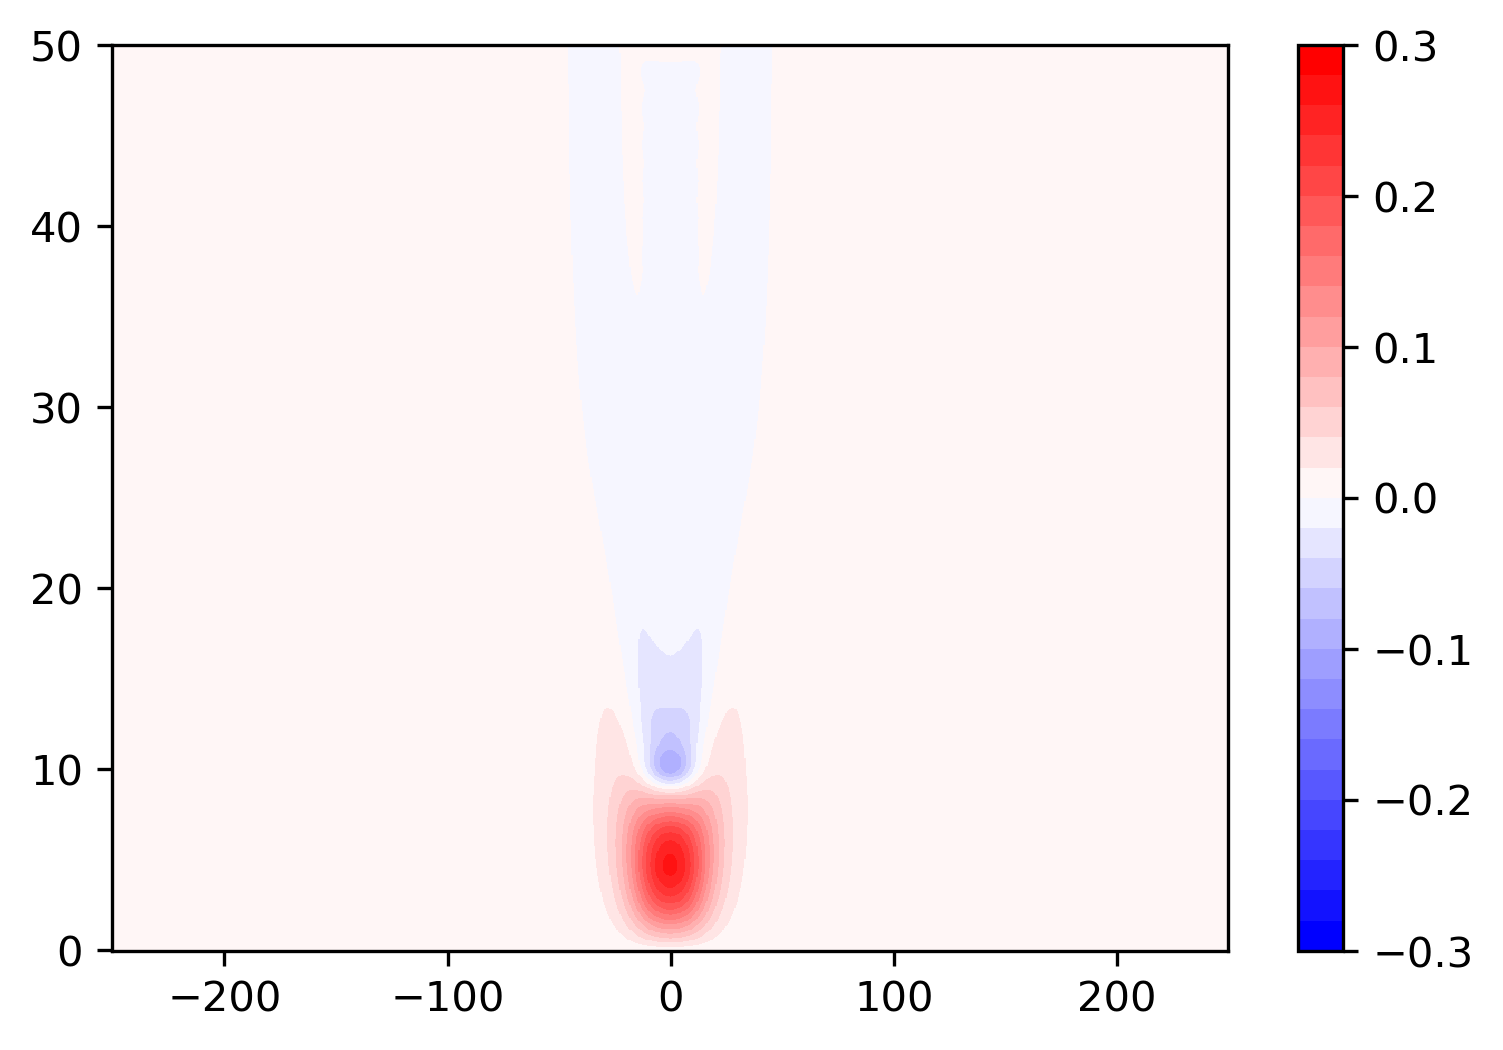

In [ ]:
from animate import animator, LineType

anim = animator()
time = 4

#anim.display_line(data=simulationData, time=time, lineType = LineType.U, prefix='U')
# anim.display_line(data=simulationData, time=time, lineType = LineType.V, prefix='V')
#anim.display_line(data=simulationData, time=time, lineType = LineType.W, prefix='W')
#anim.display_line(data=simulationData, time=time, lineType = LineType.B, prefix='B')
#anim.display_line(data=simulationData, time=time, lineType = LineType.P, prefix='P')

#anim.display(data=sim1, time=time, prefix='Sim1 (last) ')

anim.images(sim1, 'test', True)